## Import important libraries and packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
tf.compat.v1.enable_eager_execution()
tf.compat.v1.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


## Setup a linear function

A simple linear function can show the whole point behind linear regression. Having a linear function we can find (predict) the value of a point on y based on the input we get on x.

In [2]:
X = np.arange(0.0,5.0,0.1) #Create array on numbers ranginng from 0 to 5 with step .1

In [3]:
#The weight and bias
w = 1 #Weight or Slope
b = 0 #Bias

Y= w*X + b

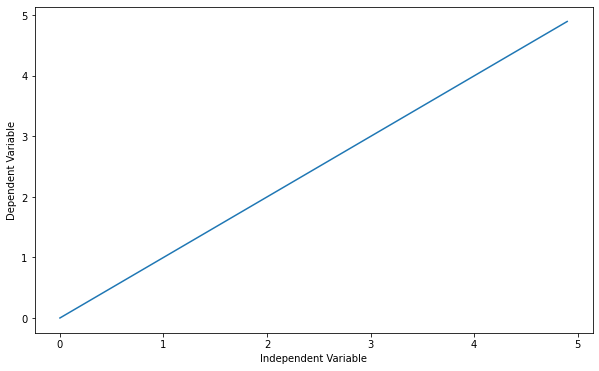

In [4]:
plt.plot(X,Y)
plt.ylabel("Dependent Variable")
plt.xlabel("Independent Variable")
plt.show()

## Linear Regression with Tensorflow

#### Import data

In [5]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
df = pd.read_csv("FuelConsumption.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


The task is to find the carbon di oxide emmision of cars based on their engine size. So the engine size is going to be the independent variable and the co2 emmision is going to be the dependent varibable

In [7]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

## Initialize the weight and bias

In [8]:
a = tf.Variable(12.3) #The weight
b = tf.Variable(65.2) #The bias
y = a * train_x + b #The function (model)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Define the loss function

In [9]:
loss = tf.reduce_mean(tf.square(y-train_y)) #The cost function

## Define the optimizer

In [10]:
#Internal value is a learning rate
optimizer = tf.compat.v1.train.GradientDescentOptimizer(0.05)

## Define the training method

In [12]:
#Used to minimize the error function
train = optimizer.minimize(loss) 

## Initialize the variables

In [13]:
init = tf.compat.v1.global_variables_initializer()
sess = tf.compat.v1.Session()
sess.run(init)

In [14]:
loss_values = []
train_data = []
for step in range(100):
    _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
    loss_values.append(loss_val)
    if step % 5 == 0:
        print(step, loss_val, a_val, b_val)
        train_data.append([a_val, b_val])

0 24848.352 12.3 65.2
5 1277.3307 51.47528 78.92448
10 1230.6138 50.20951 82.0303
15 1192.6096 49.446613 85.0275
20 1159.6857 48.731964 87.81602
25 1131.1632 48.066845 90.41149
30 1106.4536 47.447777 92.82726
35 1085.0466 46.871567 95.07578
40 1066.5015 46.33525 97.168625
45 1050.435 45.836063 99.11657
50 1036.5167 45.37144 100.92966
55 1024.459 44.938984 102.61721
60 1014.01263 44.53647 104.18793
65 1004.9631 44.161823 105.6499
70 997.1231 43.813114 107.01065
75 990.3312 43.48855 108.2772
80 984.447 43.18645 109.45605
85 979.34955 42.90527 110.55328
90 974.93365 42.64356 111.57455
95 971.108 42.399967 112.5251


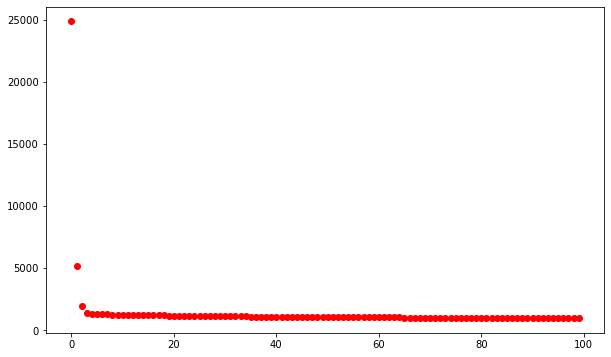

In [16]:
#Change in loss every step
plt.plot(loss_values, 'ro')